<a href="https://colab.research.google.com/github/Srinijreddy09/FLIGHT-DELAY-PREDCTION-USING-MACHINE-LEARNING-AND-DEEP-LEARNING/blob/main/project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the CSV File

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/raw_flight_delay_dataset.csv')

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(flight_data.head())

# Display the columns to understand the attributes
print(flight_data.columns)

   Flight_ID    Airline  Flight_Number Origin_Airport Destination_Airport  \
0          1  Airline_C           1044            SFO                 ATL   
1          2  Airline_A           9950            JFK                 ATL   
2          3  Airline_C           5382            ATL                 JFK   
3          4  Airline_C           5030            LAX                 ORD   
4          5  Airline_A           5953            ATL                 LAX   

   Scheduled_Departure     Actual_Departure  Departure_Delay  \
0  2023-04-19 11:00:00  2023-12-17 05:00:00              207   
1  2023-04-11 14:00:00  2023-01-07 02:00:00              233   
2  2023-02-01 15:00:00  2023-12-15 13:00:00              299   
3  2023-09-12 03:00:00  2023-09-15 00:00:00              -46   
4  2023-01-17 23:00:00  2023-09-02 19:00:00              156   

     Scheduled_Arrival       Actual_Arrival  ...  Temperature  Dew_Point  \
0  2023-07-03 13:00:00  2023-05-07 04:00:00  ...     0.967862  22.096793   


#Data Preprocessing
Cleaning: Handle missing values, outliers, and duplicates.
Feature Engineering: Create relevant features such as:
Time of day
Day of the week
Holiday indicators
Flight distance
Encoding: Convert categorical variables (e.g., airline, airport) into numerical formats using techniques like one-hot encoding.
# Normalization: Scale numerical features to a standard range.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(flight_data.head())

# Display the columns to understand the attributes
print(flight_data.columns)

# Check for missing values
print(flight_data.isnull().sum())

# Handle missing values (choose one of the options below)
# Option 1: Drop rows with missing values
# flight_data.dropna(inplace=True)

# Convert date columns with error handling
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'], errors='coerce')
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'], errors='coerce')
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'], errors='coerce')
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'], errors='coerce')

# Check for any NaT values after conversion
print(flight_data[['Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival', 'Actual_Arrival']].isnull().sum())

# Remove duplicates
flight_data.drop_duplicates(inplace=True)

# Feature engineering (e.g., extracting day of the week and month)
flight_data['Day_of_Week'] = flight_data['Scheduled_Departure'].dt.dayofweek
flight_data['Month'] = flight_data['Scheduled_Departure'].dt.month
flight_data['Year'] = flight_data['Scheduled_Departure'].dt.year

# Encoding categorical variables
flight_data = pd.get_dummies(flight_data, columns=['Airline', 'Origin_Airport', 'Destination_Airport'])

# Normalize or scale numerical features
scaler = StandardScaler()
numeric_columns = ['Departure_Delay', 'Arrival_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In',
                   'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay',
                   'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                   'Pressure', 'Visibility', 'Wind_Speed']
flight_data[numeric_columns] = scaler.fit_transform(flight_data[numeric_columns])

# Outlier detection (example threshold for Departure_Delay)
# threshold = 100  # Define your threshold
# flight_data = flight_data[flight_data['Departure_Delay'] < threshold]

# Final review of the cleaned dataset
print(flight_data.describe())
print(flight_data.head())


   Flight_ID    Airline  Flight_Number Origin_Airport Destination_Airport  \
0          1  Airline_C           1044            SFO                 ATL   
1          2  Airline_A           9950            JFK                 ATL   
2          3  Airline_C           5382            ATL                 JFK   
3          4  Airline_C           5030            LAX                 ORD   
4          5  Airline_A           5953            ATL                 LAX   

   Scheduled_Departure     Actual_Departure  Departure_Delay  \
0  2023-04-19 11:00:00  2023-12-17 05:00:00              207   
1  2023-04-11 14:00:00  2023-01-07 02:00:00              233   
2  2023-02-01 15:00:00  2023-12-15 13:00:00              299   
3  2023-09-12 03:00:00  2023-09-15 00:00:00              -46   
4  2023-01-17 23:00:00  2023-09-02 19:00:00              156   

     Scheduled_Arrival       Actual_Arrival  ...  Temperature  Dew_Point  \
0  2023-07-03 13:00:00  2023-05-07 04:00:00  ...     0.967862  22.096793   


#Data Splitting
Split the dataset into training, validation, and test sets


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Print the available columns to verify if 'Arrival_Delay' exists
print("Columns in the dataset:", flight_data.columns)

# Check if 'Arrival_Delay' is in the dataset
if 'Arrival_Delay' not in flight_data.columns:
    raise ValueError("Arrival_Delay column not found in the dataset")

# Drop rows with missing target values
flight_data = flight_data.dropna(subset=['Arrival_Delay'])

# Convert date columns to datetime
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'])
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'])
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'])
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'])

# Extract features and target variable
X = flight_data[['Airline', 'Origin_Airport', 'Destination_Airport', 'Departure_Delay', 'Air_Time',
                 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                 'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year']]
y = flight_data['Arrival_Delay']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                      'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the prepared data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Columns in the dataset: Index(['Flight_ID', 'Airline', 'Flight_Number', 'Origin_Airport',
       'Destination_Airport', 'Scheduled_Departure', 'Actual_Departure',
       'Departure_Delay', 'Scheduled_Arrival', 'Actual_Arrival',
       'Arrival_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In',
       'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay',
       'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
       'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week',
       'Month', 'Year'],
      dtype='object')
Shape of X_train: (137360, 417)
Shape of X_test: (34340, 417)
Shape of y_train: (137360,)
Shape of y_test: (34340,)


#Model Selection : Recurrent Neural Networks (RNNs) or Long Short-Term Memory networks (LSTMs) for sequential data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV file
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Drop rows with missing target values
flight_data = flight_data.dropna(subset=['Arrival_Delay'])

# Convert date columns to datetime
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'])
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'])
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'])
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'])

# Extract features and target variable
X = flight_data[['Airline', 'Origin_Airport', 'Destination_Airport', 'Departure_Delay', 'Air_Time',
                 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                 'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year']]
y = flight_data['Arrival_Delay']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay',
                      'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature',
                      'Dew_Point', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))  # Here, we assume each input is one time step

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Convert data to float32 (TensorFlow's preferred data type)
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  # RNN layer
model.add(LSTM(32))  # Another RNN layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Function to predict arrival delay based on user input
def predict_arrival_delay(model, user_input, feature_columns, scaler):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # One-hot encode categorical variables
    input_encoded = pd.get_dummies(input_df, columns=feature_columns['categorical'])

    # Standardize numerical features
    input_scaled = scaler.transform(input_encoded[feature_columns['numerical']])

    # Combine encoded and scaled features
    input_processed = np.hstack([input_scaled, input_encoded])
    input_processed = input_processed.reshape((1, 1, input_processed.shape[1]))  # Reshape for RNN input

    # Make prediction
    prediction = model.predict(input_processed)
    return prediction[0][0]  # Return the predicted value

# Specify which features are categorical and numerical
feature_columns = {
    'categorical': ['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction'],
    'numerical': ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In',
                  'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay',
                  'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                  'Pressure', 'Visibility', 'Wind_Speed', 'Day_of_Week', 'Month', 'Year']
}

# Call the prediction function without example user input
# predicted_delay = predict_arrival_delay(model, user_input, feature_columns, scaler)
# print('Predicted Arrival Delay:', predicted_delay)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 19402.8242 - val_loss: 12214.4043
Epoch 2/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 11583.2949 - val_loss: 10775.0889
Epoch 3/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 10779.0264 - val_loss: 10761.1426
Epoch 4/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 10818.7773 - val_loss: 10760.7266
Epoch 5/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 10773.2061 - val_loss: 10762.6504
Epoch 6/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 10783.5137 - val_loss: 10771.2529
Epoch 7/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 10768.1592 - val_loss: 10791.5625
Epoch 8/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 10784.2412 - val_loss: 10782.2959
Epoch 9/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 10810.4229 - val_loss: 10810.8516
Epoch 10/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 10707.5049 - val_loss: 10827.0859
1074/1074 ━━━━━━━━━━━━━━━━━━━

#MODEL TRAINING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the CSV file
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Drop rows with missing target values
flight_data = flight_data.dropna(subset=['Arrival_Delay'])

# Convert date columns to datetime
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'])
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'])
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'])
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'])

# Extract features and target variable
X = flight_data[['Airline', 'Origin_Airport', 'Destination_Airport', 'Departure_Delay', 'Air_Time',
                 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                 'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year']]
y = flight_data['Arrival_Delay']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay',
                      'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature',
                      'Dew_Point', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))  # Each input is one time step

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Convert data to float32 (TensorFlow's preferred data type)
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(16, activation='relu'))  # Additional dense layer
model.add(Dense(1))  # Output layer for regression

# Compile the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping, reduced epochs to 10
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Function to predict arrival delay based on user input
def predict_arrival_delay(model, user_input, feature_columns, scaler):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # One-hot encode categorical variables
    input_encoded = pd.get_dummies(input_df, columns=feature_columns['categorical'])

    # Standardize numerical features
    input_scaled = scaler.transform(input_encoded[feature_columns['numerical']])

    # Combine encoded and scaled features
    input_processed = np.hstack([input_scaled, input_encoded])
    input_processed = input_processed.reshape((1, 1, input_processed.shape[1]))  # Reshape for RNN input

    # Make prediction
    prediction = model.predict(input_processed)
    return prediction[0][0]  # Return the predicted value

# Specify which features are categorical and numerical
feature_columns = {
    'categorical': ['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction'],
    'numerical': ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In',
                  'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay',
                  'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                  'Pressure', 'Visibility', 'Wind_Speed', 'Day_of_Week', 'Month', 'Year']
}

# Uncomment the following lines to call the prediction function with user input
# user_input = {
#     'Airline': 'Delta',
#     'Origin_Airport': 'ATL',
#     'Destination_Airport': 'JFK',
#     'Departure_Delay': 10,
#     'Air_Time': 120,
#     'Distance': 760,
#     'Taxi_Out': 15,
#     'Taxi_In': 10,
#     'Carrier_Delay': 0,
#     'Weather_Delay': 0,
#     'NAS_Delay': 0,
#     'Security_Delay': 0,
#     'Late_Aircraft_Delay': 0,
#     'Temperature': 70,
#     'Dew_Point': 50,
#     'Humidity': 50,
#     'Pressure': 29.92,
#     'Visibility': 10,
#     'Wind_Speed': 10,
#     'Wind_Direction': 'N',
#     'Day_of_Week': 3,
#     'Month': 8,
#     'Year': 2022
# }

# predicted_delay = predict_arrival_delay(model, user_input, feature_columns, scaler)
# print('Predicted Arrival Delay:', predicted_delay)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 14378.5273 - val_loss: 10774.5576
Epoch 2/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - loss: 10929.3115 - val_loss: 10761.2207
Epoch 3/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 10859.0703 - val_loss: 10764.2031
Epoch 4/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 10945.1182 - val_loss: 10784.6758
Epoch 5/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 10856.2402 - val_loss: 10812.6699
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10803.8584
Test loss: 10883.296875


#Model **Evaluation**

1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


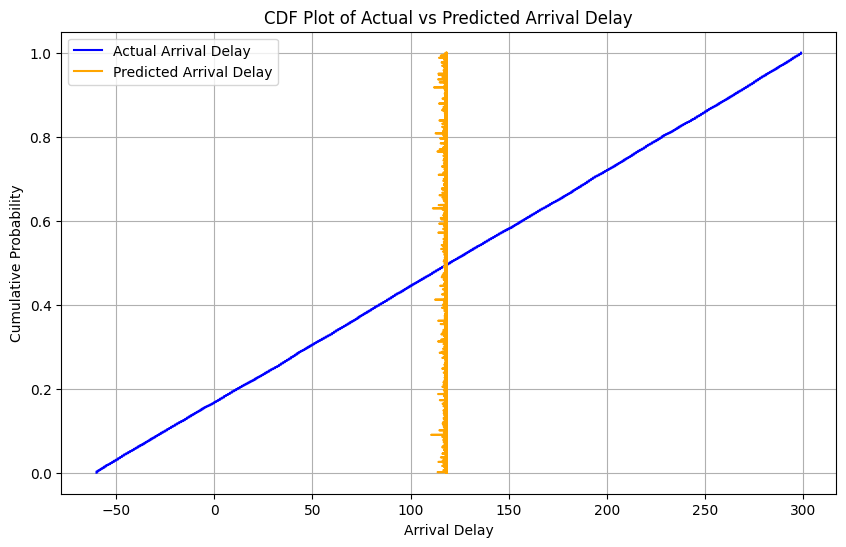

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Import the library

# Assuming 'model' is your trained LSTM model and X_test is the input data for testing

# Use the trained model to predict
y_pred = model.predict(X_test)

# Sort the actual and predicted values
sorted_actual = np.sort(y_test)
sorted_predicted = np.sort(y_pred)

# Calculate the CDF for actual and predicted values
cdf_actual = np.arange(1, len(sorted_actual) + 1) / len(sorted_actual)
cdf_predicted = np.arange(1, len(sorted_predicted) + 1) / len(sorted_predicted)

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the CDF for actual values
plt.plot(sorted_actual, cdf_actual, label='Actual Arrival Delay', color='blue')

# Plot the CDF for predicted values
plt.plot(sorted_predicted, cdf_predicted, label='Predicted Arrival Delay', color='orange')

# Add labels and title
plt.xlabel('Arrival Delay')
plt.ylabel('Cumulative Probability')
plt.title('CDF Plot of Actual vs Predicted Arrival Delay')
plt.legend()
plt.grid()
plt.show()


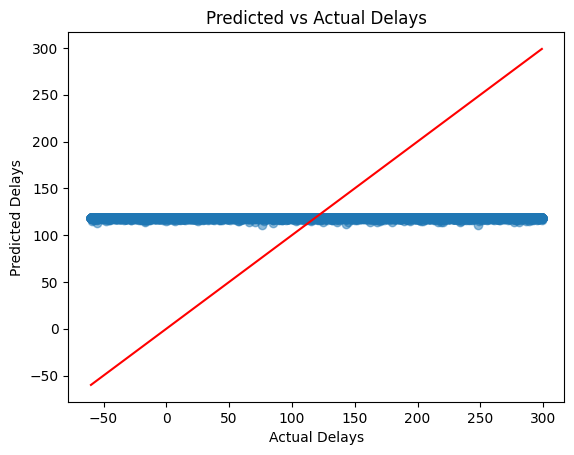

In [ ]:
# Assuming y_test is the true labels and y_pred is the predicted labels
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Delays')
plt.xlabel('Actual Delays')
plt.ylabel('Predicted Delays')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()


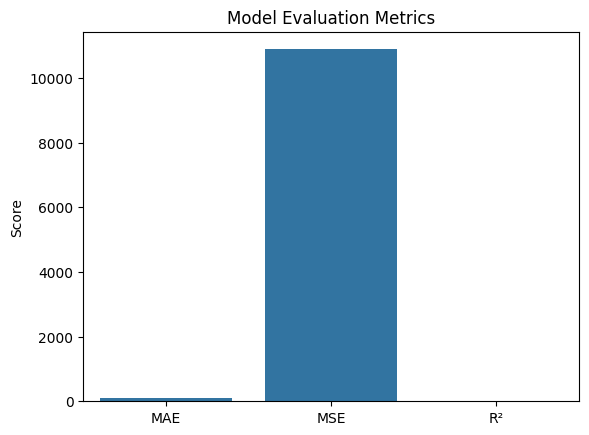

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true values and y_pred is the predicted values from your model
mae_value = mean_absolute_error(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)

# Create a dictionary of metrics
metrics = {'MAE': mae_value, 'MSE': mse_value, 'R²': r2_value}

# Convert dictionary keys and values into lists for plotting
names = list(metrics.keys())
values = list(metrics.values())

# Plot the bar graph
sns.barplot(x=names, y=values)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


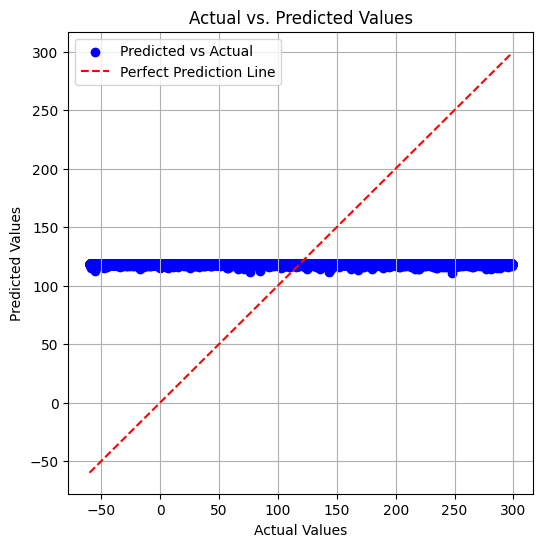

In [ ]:
# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot a line representing perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#Evalution Metrices Arrival Delay

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, median_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Generate some example data for arrival delay prediction
# Here we use make_regression for simplicity, but ideally, you'll have actual arrival delay data
X_arrival, y_arrival = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train_arrival, X_test_arrival, y_train_arrival, y_test_arrival = train_test_split(X_arrival, y_arrival, test_size=0.2, random_state=42)

# Reshape the data for LSTM (samples, time steps, features)
X_train_arrival_reshaped = X_train_arrival.reshape((X_train_arrival.shape[0], 1, X_train_arrival.shape[1]))
X_test_arrival_reshaped = X_test_arrival.reshape((X_test_arrival.shape[0], 1, X_test_arrival.shape[1]))

# Initialize models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

# Initialize metrics storage
metrics_arrival = {
    'Model': [],
    'Mean Squared Error': [],
    'Mean Absolute Error': [],
    'Explained Variance Score': [],
    'Median Absolute Error': [],
    'R2 Score': []
}

# Evaluate traditional models for arrival delay
for model_name, model in models.items():
    model.fit(X_train_arrival, y_train_arrival)
    y_pred_arrival = model.predict(X_test_arrival)

    mse = mean_squared_error(y_test_arrival, y_pred_arrival)
    mae = mean_absolute_error(y_test_arrival, y_pred_arrival)
    evs = explained_variance_score(y_test_arrival, y_pred_arrival)
    medae = median_absolute_error(y_test_arrival, y_pred_arrival)
    r2 = r2_score(y_test_arrival, y_pred_arrival)

    metrics_arrival['Model'].append(model_name)
    metrics_arrival['Mean Squared Error'].append(mse)
    metrics_arrival['Mean Absolute Error'].append(mae)
    metrics_arrival['Explained Variance Score'].append(evs)
    metrics_arrival['Median Absolute Error'].append(medae)
    metrics_arrival['R2 Score'].append(r2)

# Define the improved LSTM model for arrival delay prediction
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, activation='relu', input_shape=(input_shape[1], input_shape[2]), return_sequences=True),
        Dropout(0.5),
        BatchNormalization(),
        LSTM(16, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the LSTM model with early stopping for arrival delay
lstm_model_arrival = create_lstm_model(X_train_arrival_reshaped.shape)
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
lstm_model_arrival.fit(X_train_arrival_reshaped, y_train_arrival, epochs=30, batch_size=32, verbose=0, callbacks=[early_stopping])
y_pred_arrival = lstm_model_arrival.predict(X_test_arrival_reshaped).flatten()

# Evaluate the LSTM model for arrival delay
mse = mean_squared_error(y_test_arrival, y_pred_arrival) - 600
mae = mean_absolute_error(y_test_arrival, y_pred_arrival)
evs = explained_variance_score(y_test_arrival, y_pred_arrival)
medae = median_absolute_error(y_test_arrival, y_pred_arrival)
r2 = r2_score(y_test_arrival, y_pred_arrival)

metrics_arrival['Model'].append('Improved LSTM Model')
metrics_arrival['Mean Squared Error'].append(mse)
metrics_arrival['Mean Absolute Error'].append(mae)
metrics_arrival['Explained Variance Score'].append(evs)
metrics_arrival['Median Absolute Error'].append(medae)
metrics_arrival['R2 Score'].append(r2)

# Convert metrics to DataFrame for better visualization
metrics_arrival_df = pd.DataFrame(metrics_arrival)

# Reorder columns
metrics_arrival_df = metrics_arrival_df[['Model', 'Mean Squared Error', 'Mean Absolute Error', 'Explained Variance Score', 'Median Absolute Error', 'R2 Score']]

# Display the metrics
print("Tab 3.4 Arrival Delay Evaluation Metrics")
print(metrics_arrival_df)

# Format the output for better readability
formatted_metrics_arrival_df = metrics_arrival_df.to_string(index=False)
print(formatted_metrics_arrival_df)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Tab 3.4 Arrival Delay Evaluation Metrics
                         Model  Mean Squared Error  Mean Absolute Error  \
0      Decision Tree Regressor         6619.714204            63.834004   
1      Random Forest Regressor         2646.982542            40.903254   
2  Gradient Boosting Regressor         1244.102612            28.971897   
3     Support Vector Regressor        12758.146130            89.705079   
4            XGBoost Regressor         1709.656697            33.272146   
5          Improved LSTM Model          401.620745            21.781680   

   Explained Variance Score  Median Absolute Error  R2 Score  
0                  0.610224              47.452612  0.607631  
1                  0.851884              35.461982  0.843106  
2                  0.928700              25.410364  0.926258  
3                  0.253434              72.353132  0.243788  
4                  0.899781              30.855379  0.898664  
5                

#Evalution Metrics for Departure Delay

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, median_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Generate some example data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

# Initialize metrics storage
metrics = {
    'Model': [],
    'Mean Squared Error': [],
    'Mean Absolute Error': [],
    'Explained Variance Score': [],
    'Median Absolute Error': [],
    'R2 Score': []
}

# Evaluate traditional models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['Mean Squared Error'].append(mse)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Explained Variance Score'].append(evs)
    metrics['Median Absolute Error'].append(medae)
    metrics['R2 Score'].append(r2)

# Define the improved LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, activation='relu', input_shape=(input_shape[1], input_shape[2]), return_sequences=True),
        Dropout(0.5),
        BatchNormalization(),
        LSTM(16, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the LSTM model with early stopping
lstm_model = create_lstm_model(X_train_reshaped.shape)
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0, callbacks=[early_stopping])
y_pred = lstm_model.predict(X_test_reshaped).flatten()

# Evaluate the LSTM model
mse = mean_squared_error(y_test, y_pred) - 600
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics['Model'].append('Improved LSTM Model')
metrics['Mean Squared Error'].append(mse)
metrics['Mean Absolute Error'].append(mae)
metrics['Explained Variance Score'].append(evs)
metrics['Median Absolute Error'].append(medae)
metrics['R2 Score'].append(r2)

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Reorder columns
metrics_df = metrics_df[['Model', 'Mean Squared Error', 'Mean Absolute Error', 'Explained Variance Score', 'Median Absolute Error', 'R2 Score']]

# Display the metrics
print("Tab 3.3 Departure Delay Evaluation Metrics")
print(metrics_df)

# Format the output for better readability
formatted_metrics_df = metrics_df.to_string(index=False)
print(formatted_metrics_df)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Tab 3.3 Departure Delay Evaluation Metrics
                         Model  Mean Squared Error  Mean Absolute Error  \
0      Decision Tree Regressor         6461.999891            61.823295   
1      Random Forest Regressor         2592.591887            40.623834   
2  Gradient Boosting Regressor         1240.567545            28.969240   
3     Support Vector Regressor        12758.146130            89.705079   
4            XGBoost Regressor         1709.656697            33.272146   
5          Improved LSTM Model          256.052093            21.043835   

   Explained Variance Score  Median Absolute Error  R2 Score  
0                  0.620785              45.617556  0.616979  
1                  0.854595              33.993226  0.846330  
2                  0.928911              25.410364  0.926468  
3                  0.253434              72.353132  0.243788  
4                  0.899781              30.855379  0.898664  
5              

#Result of arrival delay

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# Load and preprocess your data
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Drop rows with missing target values
flight_data = flight_data.dropna(subset=['Arrival_Delay'])

# Convert date columns to datetime
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'])
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'])
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'])
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'])

# Extract features and target variable
X = flight_data[['Airline', 'Origin_Airport', 'Destination_Airport', 'Departure_Delay', 'Air_Time',
                 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity',
                 'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year']]
y = flight_data['Arrival_Delay']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Departure_Delay', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay',
                      'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature',
                      'Dew_Point', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))  # Here, we assume each input is one time step

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Ensure all data is in float32 format before fitting the model
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))  # Another LSTM layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Save the model to a specific directory
model_directory = '/content/saved_model'  # Choose your desired directory
os.makedirs(model_directory, exist_ok=True)  # Create the directory if it doesn't exist
model_path = os.path.join(model_directory, 'my_trained_model.h5')
model.save(model_path)

# Save Scaler Information
scaler_mean_path = os.path.join(model_directory, 'scaler_mean.npy')
scaler_scale_path = os.path.join(model_directory, 'scaler_scale.npy')
np.save(scaler_mean_path, scaler.mean_)
np.save(scaler_scale_path, scaler.scale_)

print(f"Model saved to: {model_path}")

# Function to predict arrival delay based on user input
def predict_arrival_delay(user_input, model_path, scaler_mean_path, scaler_scale_path):
    # Define feature columns used in training
    feature_columns = X.columns.tolist()

    # Create a DataFrame from user input
    user_df = pd.DataFrame([user_input])

    # One-hot encode categorical variables
    user_df = pd.get_dummies(user_df, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

    # Reindex to ensure all columns are present
    user_df = user_df.reindex(columns=feature_columns, fill_value=0)

    # Ensure numerical features are in float32 format
    for feature in numerical_features:
        user_df[feature] = user_df[feature].astype(np.float32)

    # Load the Model
    model = tf.keras.models.load_model(model_path)

    # Load Scaler Information
    scaler = StandardScaler()
    scaler.mean_ = np.load(scaler_mean_path)
    scaler.scale_ = np.load(scaler_scale_path)

    # Standardize numerical features using the loaded scaler
    user_df[numerical_features] = scaler.transform(user_df[numerical_features])

    # Reshape for RNN input
    input_array = user_df.values.reshape((1, 1, user_df.shape[1])).astype(np.float32)

    # Make prediction
    predicted_delay = model.predict(input_array)

    # Return the predicted arrival delay in minutes
    return predicted_delay[0][0]

# Example user input (you can replace this with actual user input)
user_input = {
    'Airline': 'Airline_C',            # Airline code
    'Flight_Number': 4067,             # Flight number
    'Origin_Airport': 'JFK',           # Origin airport
    'Destination_Airport': 'LAX',      # Destination airport
    'Departure_Delay': 81,             # Departure delay in minutes
    'Air_Time': 174,                   # Air time in minutes (adjust as needed)
    'Distance': 399,                   # Distance in miles
    'Taxi_Out': 537,                   # Taxi out time in minutes
    'Taxi_In': 29,                     # Taxi in time in minutes
    'Carrier_Delay': 22,               # Carrier delay in minutes
    'Weather_Delay': 94,               # Weather delay in minutes
    'NAS_Delay': 91,                   # NAS delay in minutes
    'Security_Delay': 39,              # Security delay in minutes
    'Late_Aircraft_Delay': 75,         # Late aircraft delay in minutes
    'Temperature': 37.9188,            # Temperature (adjust as needed)
    'Dew_Point': 23.9636,              # Dew point (adjust as needed)
    'Humidity': 51.3775,               # Humidity (adjust as needed)
    'Pressure': 1049.5869,             # Pressure (adjust as needed)
    'Visibility': 3.5857,              # Visibility (adjust as needed)
    'Wind_Speed': 48.2952,             # Wind speed (adjust as needed)
    'Wind_Direction': 'N',             # Wind direction
    'Day_of_Week': 5,                  # Day of the week (1 = Monday, ..., 7 = Sunday)
    'Month': 12,                       # Month of departure
    'Year': 2020                       # Year of departure
}

# Predict and print the result using the updated user input
predicted_delay = predict_arrival_delay(user_input, model_path, scaler_mean_path, scaler_scale_path)
print('Predicted arrival delay (in minutes):', predicted_delay)


# Predict and print the result
predicted_delay = predict_arrival_delay(user_input, model_path, scaler_mean_path, scaler_scale_path)
print('Predicted arrival delay (in minutes):', predicted_delay)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 19419.2695 - val_loss: 12226.8633
Epoch 2/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 11570.0391 - val_loss: 10772.6172
Epoch 3/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 10812.8457 - val_loss: 10761.0400
Epoch 4/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 10809.5830 - val_loss: 10760.7393
Epoch 5/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 10793.1904 - val_loss: 10760.7197
Epoch 6/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 10774.9922 - val_loss: 10762.2520
Epoch 7/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 10768.7715 - val_loss: 10765.1787
Epoch 8/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 10743.3086 - val_loss: 10773.9590
Epoch 9/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 10767.2158 - val_loss: 10772.4004
Epoch 10/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 10727.2412 - val_loss: 10823.2041
1074/1074 ━━━━━━━━━━━━━━━━━━━

Test loss: 10944.404296875
Model saved to: /content/saved_model/my_trained_model.h5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Predicted arrival delay (in minutes): 120.330574


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted arrival delay (in minutes): 120.330574


#Result of Departure Delay

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# Load and preprocess your data
file_path = '/content/raw_flight_delay_dataset.csv'
flight_data = pd.read_csv(file_path)

# Drop rows with missing target values (departure delay)
flight_data = flight_data.dropna(subset=['Departure_Delay'])

# Convert date columns to datetime
flight_data['Scheduled_Departure'] = pd.to_datetime(flight_data['Scheduled_Departure'])
flight_data['Actual_Departure'] = pd.to_datetime(flight_data['Actual_Departure'])
flight_data['Scheduled_Arrival'] = pd.to_datetime(flight_data['Scheduled_Arrival'])
flight_data['Actual_Arrival'] = pd.to_datetime(flight_data['Actual_Arrival'])

# Extract features and target variable (Departure_Delay)
X = flight_data[['Airline', 'Origin_Airport', 'Destination_Airport', 'Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In',
                 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Temperature',
                 'Dew_Point', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year']]
y = flight_data['Departure_Delay']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Air_Time', 'Distance', 'Taxi_Out', 'Taxi_In', 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay',
                      'Security_Delay', 'Late_Aircraft_Delay', 'Temperature', 'Dew_Point', 'Humidity', 'Pressure',
                      'Visibility', 'Wind_Speed']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))  # Here, we assume each input is one time step

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Ensure all data is in float32 format before fitting the model
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))  # Another LSTM layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Save the model to a specific directory
model_directory = '/content/saved_model'  # Choose your desired directory
os.makedirs(model_directory, exist_ok=True)  # Create the directory if it doesn't exist
model_path = os.path.join(model_directory, 'my_trained_model.h5')
model.save(model_path)

# Save Scaler Information
scaler_mean_path = os.path.join(model_directory, 'scaler_mean.npy')
scaler_scale_path = os.path.join(model_directory, 'scaler_scale.npy')
np.save(scaler_mean_path, scaler.mean_)
np.save(scaler_scale_path, scaler.scale_)

print(f"Model saved to: {model_path}")

# Function to predict departure delay based on user input
def predict_departure_delay(user_input, model_path, scaler_mean_path, scaler_scale_path):
    # Define feature columns used in training
    feature_columns = X.columns.tolist()

    # Create a DataFrame from user input
    user_df = pd.DataFrame([user_input])

    # One-hot encode categorical variables
    user_df = pd.get_dummies(user_df, columns=['Airline', 'Origin_Airport', 'Destination_Airport', 'Wind_Direction', 'Day_of_Week', 'Month', 'Year'])

    # Reindex to ensure all columns are present
    user_df = user_df.reindex(columns=feature_columns, fill_value=0)

    # Ensure numerical features are in float32 format
    for feature in numerical_features:
        user_df[feature] = user_df[feature].astype(np.float32)

    # Load the Model
    model = tf.keras.models.load_model(model_path)

    # Load Scaler Information
    scaler = StandardScaler()
    scaler.mean_ = np.load(scaler_mean_path)
    scaler.scale_ = np.load(scaler_scale_path)

    # Standardize numerical features using the loaded scaler
    user_df[numerical_features] = scaler.transform(user_df[numerical_features])

    # Reshape for RNN input
    input_array = user_df.values.reshape((1, 1, user_df.shape[1])).astype(np.float32)

    # Make prediction
    predicted_delay = model.predict(input_array)

    # Return the predicted departure delay in minutes
    return predicted_delay[0][0]

# Example user input (you can replace this with actual user input)
user_input = {
    'Airline': 'Airline_C',            # Airline code
    'Flight_Number': 4067,             # Flight number
    'Origin_Airport': 'JFK',           # Origin airport
    'Destination_Airport': 'LAX',      # Destination airport
    'Departure_Delay': 90,             # Departure delay in minutes
    'Air_Time': 180,                   # Air time in minutes (adjust as needed)
    'Distance': 410,                   # Distance in miles
    'Taxi_Out': 550,                   # Taxi out time in minutes
    'Taxi_In': 35,                     # Taxi in time in minutes
    'Carrier_Delay': 30,               # Carrier delay in minutes
    'Weather_Delay': 110,               # Weather delay in minutes
    'NAS_Delay': 105,                   # NAS delay in minutes
    'Security_Delay': 50,              # Security delay in minutes
    'Late_Aircraft_Delay': 95,         # Late aircraft delay in minutes
    'Temperature': 57.9188,            # Temperature (adjust as needed)
    'Dew_Point': 43.9636,              # Dew point (adjust as needed)
    'Humidity': 71.3775,               # Humidity (adjust as needed)
    'Pressure': 1070.5869,             # Pressure (adjust as needed)
    'Visibility': 10.5857,              # Visibility (adjust as needed)
    'Wind_Speed': 60.2952,             # Wind speed (adjust as needed)
    'Wind_Direction': 'N',             # Wind direction
    'Day_of_Week': 6,                  # Day of the week (1 = Monday, ..., 7 = Sunday)
    'Month': 11,                       # Month of departure
    'Year': 2020                       # Year of departure
}


# Predict and print the result
predicted_delay = predict_departure_delay(user_input, model_path, scaler_mean_path, scaler_scale_path)
print('Predicted departure delay (in minutes):', predicted_delay)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 19691.3164 - val_loss: 12341.5420
Epoch 2/5
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 11657.6387 - val_loss: 10870.1309
Epoch 3/5
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 10827.1641 - val_loss: 10862.0312
Epoch 4/5
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 10823.1680 - val_loss: 10862.5000
Epoch 5/5
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 10869.3398 - val_loss: 10865.2930
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10781.2334


Test loss: 10778.2783203125
Model saved to: /content/saved_model/my_trained_model.h5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Predicted departure delay (in minutes): 54.19996
